In [9]:
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")


In [10]:
df.head()

,Date,bdl_Open,bdl_High,bdl_Low,bdl_Close,bdl_Adj Close,bdl_Volume,hal_Open,hal_High,hal_Low,...,hal_Volume,zentec_Open,zentec_High,zentec_Low,zentec_Close,zentec_Adj Close,zentec_Volume,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,02-04-2018,399.000000,402.000000,386.250000,390.750000,348.683014,486346.0,1127.699951,1155.000000,1100.050049,...,463619.0,115.000000,121.949997,113.849998,118.800003,117.198601,680990.0,NaN,NaN,NaN
1,09-04-2018,392.000000,393.000000,372.299988,375.700012,335.253265,338510.0,1100.500000,1150.000000,1080.099976,...,352724.0,118.599998,127.900002,117.050003,123.849998,122.180527,1132548.0,NaN,NaN,NaN
2,16-04-2018,373.000000,421.899994,373.000000,415.600006,370.857788,1818906.0,1125.000000,1164.000000,1118.000000,...,324581.0,121.500000,128.800003,118.800003,122.849998,121.194008,940794.0,NaN,NaN,NaN
3,23-04-2018,415.799988,421.000000,403.000000,405.000000,361.398956,358349.0,1132.000000,1149.000000,1122.000000,...,137822.0,121.599998,131.399994,120.000000,121.849998,120.207481,1073345.0,NaN,NaN,NaN
4,30-04-2018,400.549988,411.399994,386.350006,388.850006,346.987610,172209.0,1134.400024,1134.400024,1089.199951,...,68802.0,122.900002,124.349998,113.199997,115.599998,114.041733,443155.0,NaN,NaN,NaN


In [11]:
import pandas as pd
from statsmodels.tsa.stattools import kpss

# Assuming you have loaded your data into a DataFrame (df)

# Fill missing values with the mean
df['hal_High'].fillna(df['hal_High'].mean(), inplace=True)

# Perform the KPSS test
kpss_stat, p_value, lags, critical_values = kpss(df['hal_High'], nlags='auto')

# Print the results
print(f'KPSS Statistic: {kpss_stat}')
print(f'P-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'  {key}: {value}')

# Check for non-stationarity based on the p-value and significance level (e.g., 0.05)
if p_value < 0.05:
    print('The time series is non-stationary (reject the null hypothesis).')
else:
    print('The time series is stationary (fail to reject the null hypothesis).')


KPSS Statistic: 1.4296887215600484
P-value: 0.01
Critical Values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739
The time series is non-stationary (reject the null hypothesis).


C:\Users\sameer\AppData\Local\Temp\ipykernel_1352\2731529707.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hal_High'].fillna(df['hal_High'].mean(), inplace=True)
C:\Users\sameer\AppData\Local\Temp\ipykernel_1352\2731529707.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(df['hal_High'], nlags='auto')


In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming you have loaded your data into a DataFrame (df)

# Fill missing values with the mean
df['hal_High'].fillna(df['hal_High'].mean(), inplace=True)

# Perform the ADF test
adf_stat, p_value, _, _, _, _ = adfuller(df['hal_High'])

# Print the results
print(f'ADF Statistic: {adf_stat}')
print(f'P-value: {p_value}')

# Check for stationarity based on the p-value and significance level (e.g., 0.05)
if p_value < 0.05:
    print('The time series is stationary (reject the null hypothesis).')
else:
    print('The time series is non-stationary (fail to reject the null hypothesis).')


ADF Statistic: -1.7553452477908078
P-value: 0.40284587130658667
The time series is non-stationary (fail to reject the null hypothesis).


C:\Users\sameer\AppData\Local\Temp\ipykernel_1352\1327066264.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['hal_High'].fillna(df['hal_High'].mean(), inplace=True)


In [16]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Read the CSV file into a DataFrame
df = pd.read_csv('TimeSeriesDatasetModified.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a subplot with candlestick and volume bar charts
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Candlestick chart
candlestick = go.Candlestick(
    x=df['Date'],
    open=df['bdl_Open'],
    high=df['bdl_High'],
    low=df['bdl_Low'],
    close=df['bdl_Close'],
    name='Candlestick'
)

# Volume bar chart
volume_bar = go.Bar(
    x=df['Date'],
    y=df['bdl_Volume'],
    name='Volume',
    marker_color='blue'
)

# Add the candlestick and volume bar charts to the subplot
fig.add_trace(candlestick, row=1, col=1)
fig.add_trace(volume_bar, row=2, col=1)

# Update the layout of the subplot
fig.update_layout(
    title='Stock Candlestick Chart with Volume',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price', domain=[0.4, 1]),
    yaxis2=dict(title='Volume', domain=[0, 0.2]),
)

# Show the plot
fig.show()


ValueError: time data "16-04-2018" doesn't match format "%m-%d-%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Read the CSV file into a DataFrame
df = pd.read_csv('TimeSeriesDatasetModified.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a subplot with candlestick and volume bar charts
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Candlestick chart
candlestick = go.Candlestick(
    x=df['Date'],
    open=df['hal_Open'],
    high=df['hal_High'],
    low=df['hal_Low'],
    close=df['hal_Close'],
    name='Candlestick'
)

# Volume bar chart
volume_bar = go.Bar(
    x=df['Date'],
    y=df['hal_Volume'],
    name='Volume',
    marker_color='blue'
)

# Add the candlestick and volume bar charts to the subplot
fig.add_trace(candlestick, row=1, col=1)
fig.add_trace(volume_bar, row=2, col=1)

# Update the layout of the subplot
fig.update_layout(
    title='Stock Candlestick Chart with Volume',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price', domain=[0.4, 1]),
    yaxis2=dict(title='Volume', domain=[0, 0.2]),
)

# Show the plot
fig.show()


<ipython-input-6-59d4ec246fc8>:9: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Read the CSV file into a DataFrame
df = pd.read_csv('TimeSeriesDatasetModified.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a subplot with candlestick and volume bar charts
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

# Candlestick chart
candlestick = go.Candlestick(
    x=df['Date'],
    open=df['zentec_Open'],
    high=df['zentec_High'],
    low=df['zentec_Low'],
    close=df['zentec_Close'],
    name='Candlestick'
)

# Volume bar chart
volume_bar = go.Bar(
    x=df['Date'],
    y=df['zentec_Volume'],
    name='Volume',
    marker_color='blue'
)

# Add the candlestick and volume bar charts to the subplot
fig.add_trace(candlestick, row=1, col=1)
fig.add_trace(volume_bar, row=2, col=1)

# Update the layout of the subplot
fig.update_layout(
    title='Stock Candlestick Chart with Volume',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price', domain=[0.4, 1]),
    yaxis2=dict(title='Volume', domain=[0, 0.2]),
)

# Show the plot
fig.show()


<ipython-input-7-44573383a8e2>:9: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
df.size

5632

df. *describe* This funtion shows the number of elements in dataset.

In [ ]:
df.ndim

2

df. *describe* This function returns the dimensions of the dataset.

In [ ]:
df.describe()

,bdl_Open,bdl_High,bdl_Low,bdl_Close,bdl_Adj Close,bdl_Volume,hal_Open,hal_High,hal_Low,hal_Close,hal_Adj Close,hal_Volume,zentec_Open,zentec_High,zentec_Low,zentec_Close,zentec_Adj Close,zentec_Volume,Unnamed: 19,Unnamed: 20
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02,0.0,0.0
mean,421.893874,443.745257,332.679926,423.421937,408.628142,2.414973e+06,1126.181226,1040.614060,909.379356,1128.578657,1062.268750,2.187884e+06,110.365613,116.445257,104.629645,109.869763,109.442157,1.707624e+06,NaN,NaN
std,203.609580,214.924889,54.814658,206.181560,212.943620,4.078128e+06,552.871833,347.959373,236.743435,558.261642,583.772081,2.746104e+06,60.228278,62.631394,58.176425,60.063111,60.251732,3.317936e+06,NaN,NaN
min,165.000000,191.800003,207.100006,181.550003,173.258652,3.399900e+04,470.000000,528.000000,470.000000,501.850006,459.752686,2.051900e+04,24.549999,27.500000,21.299999,25.799999,25.613701,6.176000e+04,NaN,NaN
25%,295.000000,308.000000,285.350006,290.850006,274.164154,2.249820e+05,750.000000,776.000000,719.000000,743.400024,653.323364,1.032320e+05,67.500000,72.449997,62.500000,65.900002,65.237930,2.663310e+05,NaN,NaN
50%,350.000000,365.000000,333.260727,348.049988,331.481293,9.082150e+05,940.000000,968.500000,896.000000,935.450012,843.896545,1.014178e+06,83.500000,87.949997,77.849998,82.550003,81.663971,6.809900e+05,NaN,NaN
75%,415.850006,440.000000,374.299988,419.450012,405.447205,3.017064e+06,1340.050049,1173.802371,1087.527867,1341.400024,1296.829102,3.381637e+06,181.100006,189.949997,172.000000,176.399994,176.399994,1.527140e+06,NaN,NaN
max,985.000000,1026.949951,450.100006,980.049988,980.049988,3.242625e+07,2792.250000,2298.000000,1560.099976,2774.250000,2774.250000,1.553717e+07,234.899994,257.750000,215.000000,228.699997,228.592758,3.516678e+07,NaN,NaN


df. *describe* This function shows statistical calculations like mean,percentile ,standard deviation , min,max etc

In [ ]:
df.sample()

,Date,bdl_Open,bdl_High,bdl_Low,bdl_Close,bdl_Adj Close,bdl_Volume,hal_Open,hal_High,hal_Low,...,hal_Volume,zentec_Open,zentec_High,zentec_Low,zentec_Close,zentec_Adj Close,zentec_Volume,Unnamed: 19,Unnamed: 20,Unnamed: 21
118,2020-06-07,384.200012,455.0,374.299988,405.850006,387.314911,32426251.0,856.0,1028.0,825.0,...,10876381.0,53.799999,54.950001,51.049999,51.700001,51.326679,575658.0,NaN,NaN,NaN


df. *describe* This function generates a random row or column from the datset

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning:




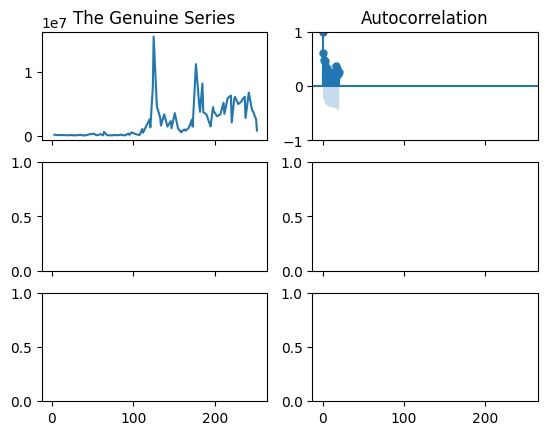

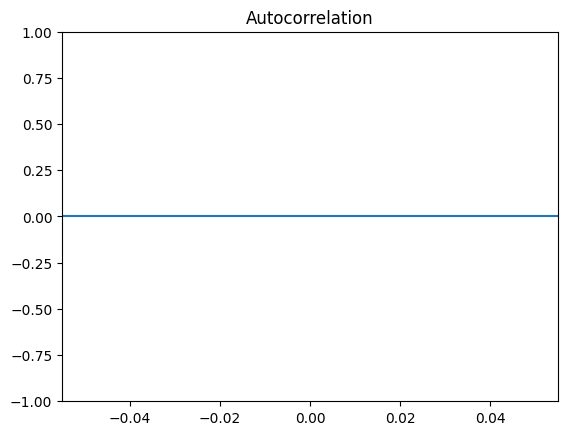

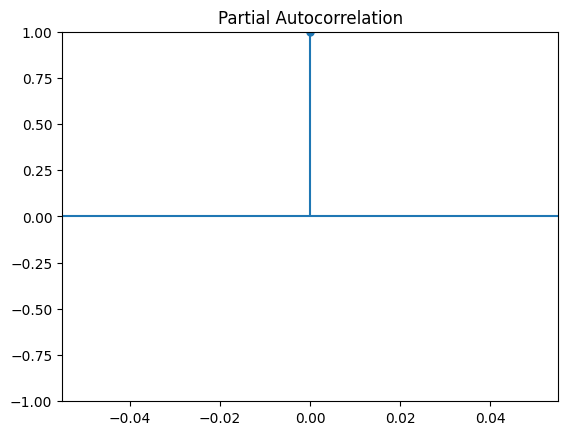

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency infor

Optimal (p, d, q) values: (1, 1, 2)


In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
fig, axes = plt.subplots(3, 2, sharex = True)
axes[0, 0].plot(dftrain['hal_Volume'])
axes[0, 0].set_title('The Genuine Series')
plot_acf(dftrain['hal_Volume'], ax=axes[0,1]);
dftrain=pd.read_csv("TimeSeriesDatasetModified.csv")
dates = pd.to_datetime(dftrain['hal_Volume'])
values =dftrain['hal_Volume']
series = pd.Series(values.values, index=dates)

# Determine the optimal values for p and q using ACF and PACF plots
plot_acf(series)
plt.show()

plot_pacf(series)
plt.show()

# Grid search to find the optimal values for p, d, and q
best_aic = np.inf
best_order = None

for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = ARIMA(series, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic

                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                   continue
print(f"Optimal (p, d, q) values: {best_order}")

In [54]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='02/04/2018'
end_date='09/08/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftrain['bdl_High'])
values =dftrain['bdl_High']
series = pd.Series(values.values, index=dates)



# Fit the ARIMA model
order = (1,1,2)
model = ARIMA(dftrain['bdl_High'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 112 values
forecast = model_fit.forecast(steps=112)
# Print the forecasted values
print(forecast)

                               SARIMAX Results                                
Dep. Variable:               bdl_High   No. Observations:                   58
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -310.761
Date:                Fri, 06 Oct 2023   AIC                            629.521
Time:                        15:26:04   BIC                            637.693
Sample:                             0   HQIC                           632.697
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5890      0.206     -2.859      0.004      -0.993      -0.185
ma.L1          0.4479      0.294      1.525      0.127      -0.128       1.024
ma.L2          0.3142      0.126      2.500      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

<ipython-input-74-8256501fe721>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MAE: 44.024456467373234
MAPE: 10.565675651276646


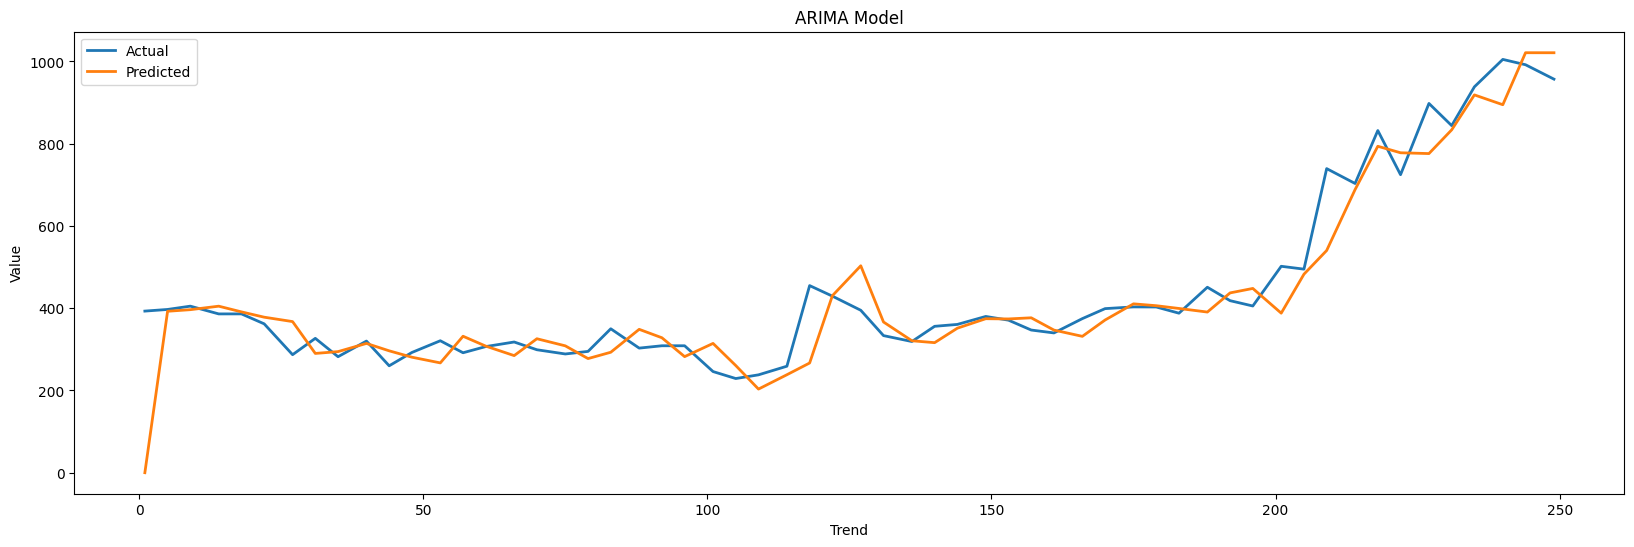

In [74]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='02/04/2018'
end_date='09/08/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]

# Prepare the data

dftrain['bdl_High'] = dftrain['bdl_High'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftrain['bdl_High'], predictions)
print("MAE:", MAE)
mape = mape(dftrain['bdl_High'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftrain['bdl_High'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()


In [19]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='16/08/2021'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftest['bdl_High'])
values =dftest['bdl_High']
series = pd.Series(values.values, index=dates)



# Fit the ARIMA model
order = (1,1,2)
model = ARIMA(dftest['bdl_High'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 76 values
forecast = model_fit.forecast(steps=177)
# Print the forecasted values
print(forecast)

                               SARIMAX Results                                
Dep. Variable:               bdl_High   No. Observations:                   91
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -485.434
Date:                Fri, 06 Oct 2023   AIC                            978.869
Time:                        14:51:19   BIC                            988.868
Sample:                             0   HQIC                           982.901
                                 - 91                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4569      0.948     -0.482      0.630      -2.315       1.402
ma.L1          0.4346      0.933      0.466      0.641      -1.394       2.263
ma.L2         -0.1010      0.109     -0.927      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

<ipython-input-20-f1c2229197a2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['bdl_High'] = dftest['bdl_High'].astype(float)


MAE: 37.930796892972566
MAPE: 8.808693145832851


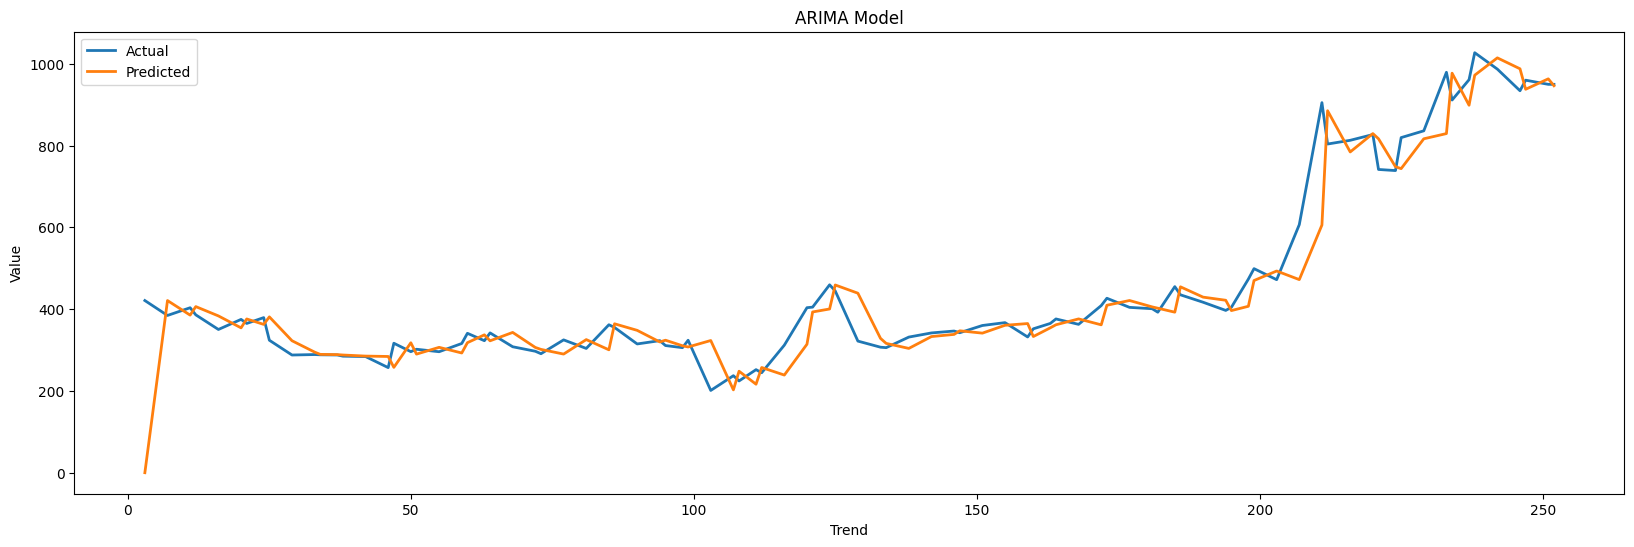

In [20]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='16/08/2021'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data

dftest['bdl_High'] = dftest['bdl_High'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftest['bdl_High'], predictions)
print("MAE:", MAE)
mape = mape(dftest['bdl_High'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftest['bdl_High'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()


In [53]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='02/04/2018'
end_date='09/08/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftrain['bdl_Low'])
values =dftrain['bdl_Low']
series = pd.Series(values.values, index=dates)



# Fit the ARIMA model
order = (1,1,2)
model = ARIMA(dftrain['bdl_Low'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 112 values
forecast = model_fit.forecast(steps=112)
# Print the forecasted values
print(forecast)

                               SARIMAX Results                                
Dep. Variable:                bdl_Low   No. Observations:                   58
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -282.046
Date:                Fri, 06 Oct 2023   AIC                            572.091
Time:                        15:25:43   BIC                            580.263
Sample:                             0   HQIC                           575.267
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1313      0.398     -0.330      0.741      -0.911       0.649
ma.L1         -0.0366      0.276     -0.133      0.895      -0.578       0.505
ma.L2         -0.4809      0.114     -4.216      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

<ipython-input-23-63070ed15b6d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['bdl_Low'] = dftrain['bdl_Low'].astype(float)


MAE: 28.95745309777984
MAPE: 8.901461989158342


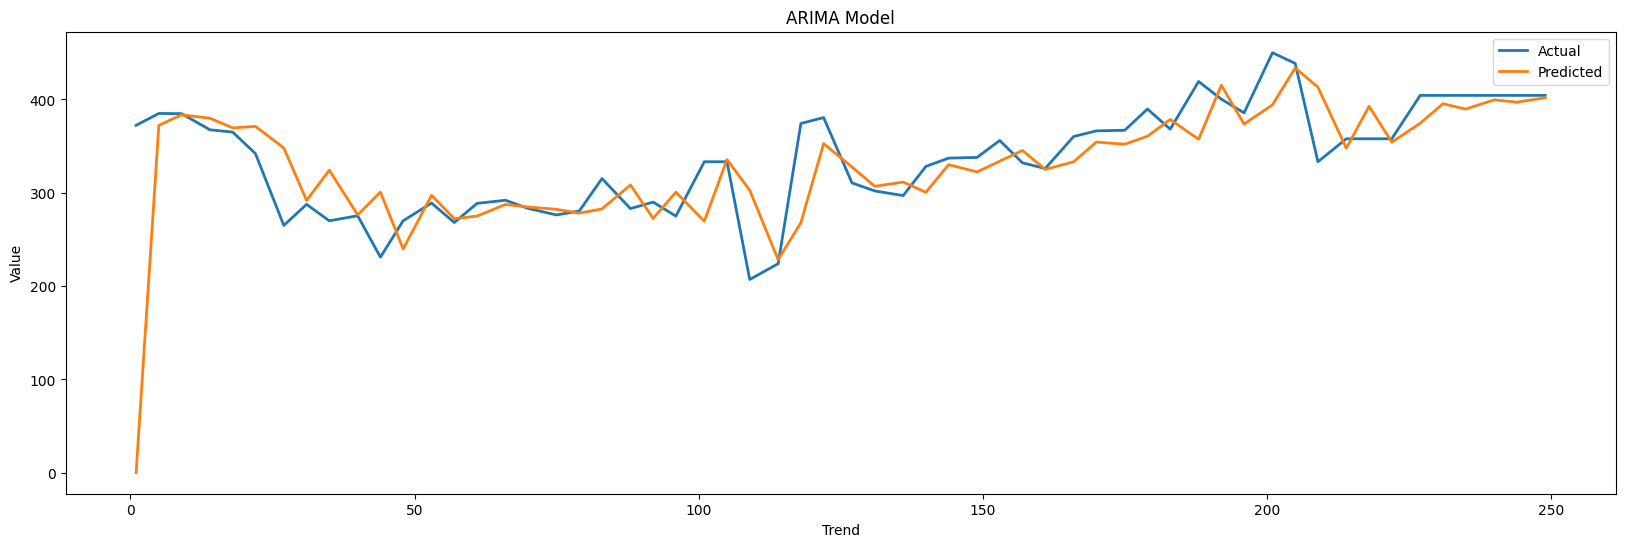

In [23]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='02/04/2018'
end_date='09/08/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data

dftest['bdl_Low'] = dftrain['bdl_Low'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftrain['bdl_Low'], predictions)
print("MAE:", MAE)
mape = mape(dftrain['bdl_Low'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftrain['bdl_Low'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()


In [17]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='16/08/2022'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftest['bdl_Low'])
values =dftest['bdl_Low']
series = pd.Series(values.values, index=dates)



# Fit the ARIMA model
order = (1,1,2)
model = ARIMA(dftest['bdl_Low'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 76 values
forecast = model_fit.forecast(steps=76)
# Print the forecasted values
print(forecast)

                               SARIMAX Results                                
Dep. Variable:                bdl_Low   No. Observations:                   91
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -433.943
Date:                Fri, 06 Oct 2023   AIC                            875.886
Time:                        14:50:01   BIC                            885.885
Sample:                             0   HQIC                           879.918
                                 - 91                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6239      0.213      2.925      0.003       0.206       1.042
ma.L1         -0.7434      0.281     -2.644      0.008      -1.294      -0.192
ma.L2         -0.1122      0.121     -0.924      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with

<ipython-input-16-b703478c890f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['bdl_Low'] = dftest['bdl_Low'].astype(float)


MAE: 23.86583926539873
MAPE: 7.312403633683699


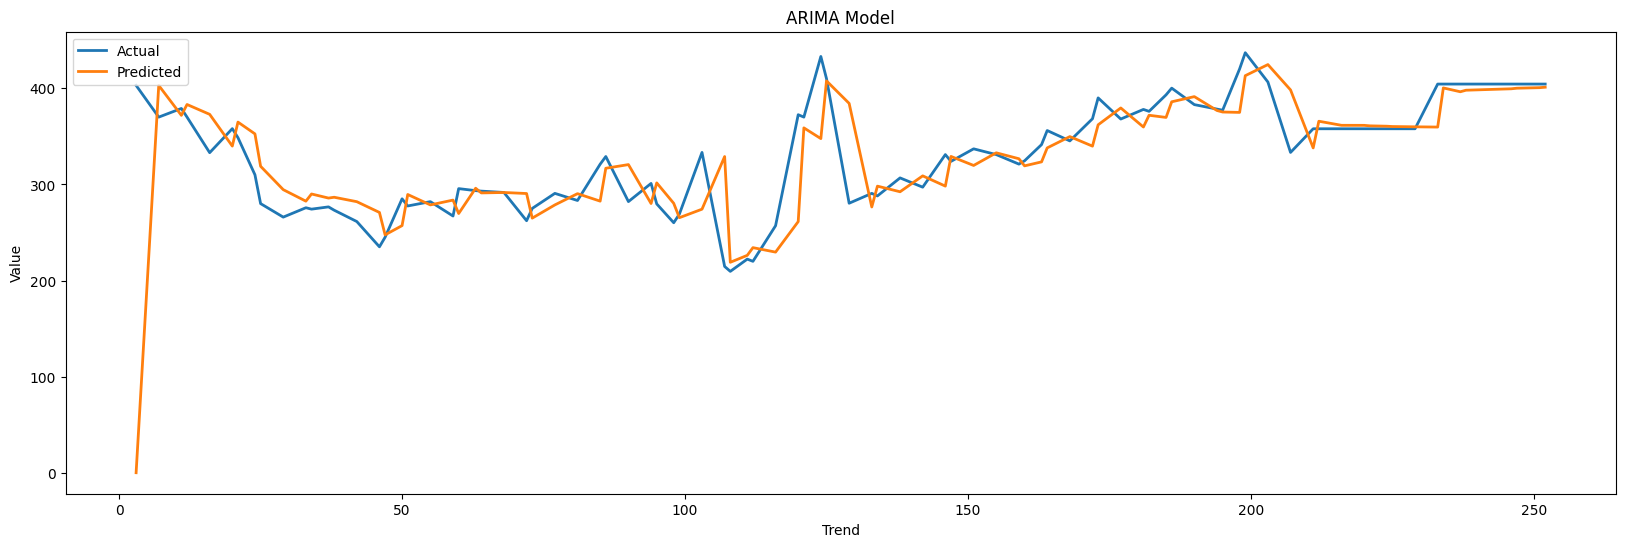

In [16]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='16/08/2022'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data

dftest['bdl_Low'] = dftest['bdl_Low'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftest['bdl_Low'], predictions)
print("MAE:", MAE)
mape = mape(dftest['bdl_Low'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftest['bdl_Low'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()


In [52]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='02/04/2018'
end_date='09/08/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftrain['hal_High'])
values =dftrain['hal_High']
series = pd.Series(values.values, index=dates)



# Fit the ARIMA model
order = (1,1,2)
model = ARIMA(dftrain['hal_High'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 112 values
forecast = model_fit.forecast(steps=112)
# Print the forecasted values
print(forecast)

                               SARIMAX Results                                
Dep. Variable:               hal_High   No. Observations:                   58
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -378.938
Date:                Fri, 06 Oct 2023   AIC                            765.876
Time:                        15:23:42   BIC                            774.048
Sample:                             0   HQIC                           769.052
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6966      1.185     -0.588      0.557      -3.019       1.626
ma.L1          0.3969      1.267      0.313      0.754      -2.086       2.880
ma.L2         -0.0561      0.460     -0.122      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

<ipython-input-85-5f9dfa597c01>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MAE: 134.03026060958973
MAPE: 12.719746169663798


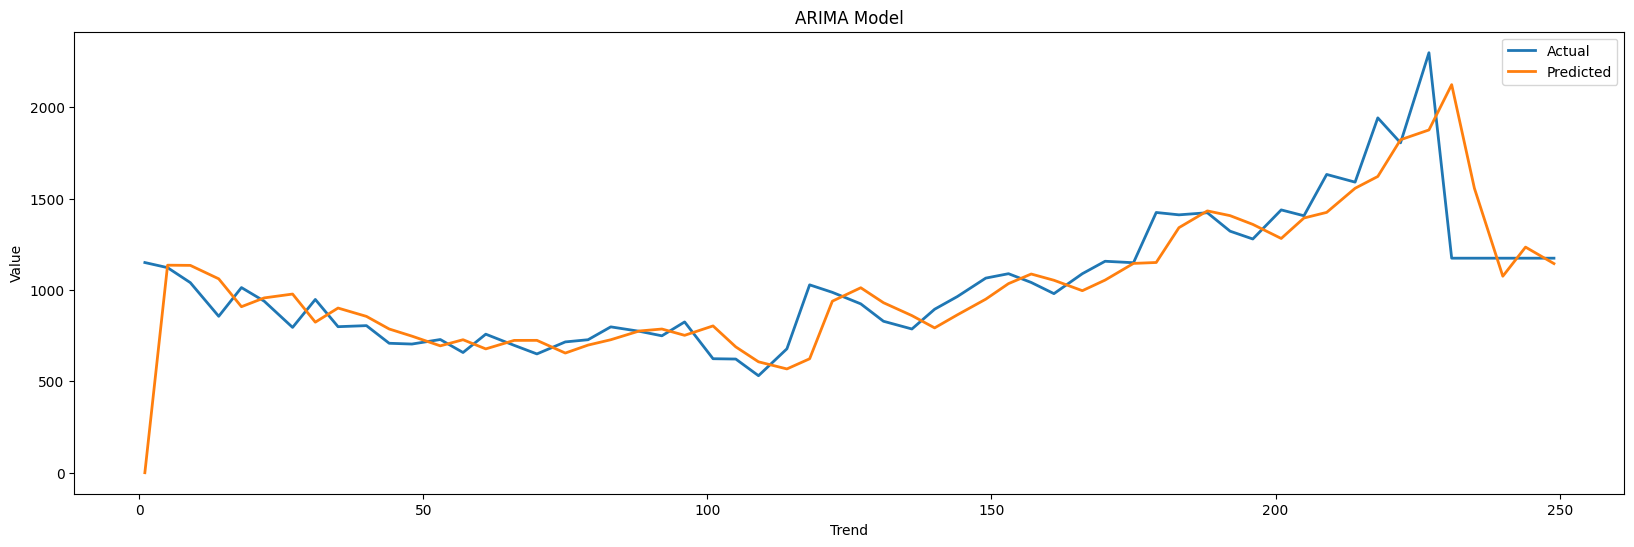

In [85]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='02/04/2018'
end_date='09/08/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]

# Prepare the data

dftrain['hal_High'] = dftrain['hal_High'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftrain['hal_High'], predictions)
print("MAE:", MAE)
mape = mape(dftrain['hal_High'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftrain['hal_High'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()


In [4]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='16/08/2021'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftest['hal_High'])
values =dftest['hal_High']
series = pd.Series(values.values, index=dates)



# Fit the ARIMA model
order = (1,1,2)
model = ARIMA(dftest['hal_High'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 76 values
forecast = model_fit.forecast(steps=76)
# Print the forecasted values
print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               hal_High   No. Observations:                   91
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -584.957
Date:                Fri, 06 Oct 2023   AIC                           1177.913
Time:                        14:10:00   BIC                           1187.913
Sample:                             0   HQIC                          1181.946
                                 - 91                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7254      0.320      2.264      0.024       0.097       1.353
ma.L1         -0.8675      0.309     -2.804      0.005      -1.474      -0.261
ma.L2         -0.0051      0.187     -0.027      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<ipython-input-7-691b787af9b4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['hal_High'] = dftest['hal_High'].astype(float)


MAE: 107.50107717754884
MAPE: 9.888687854846937


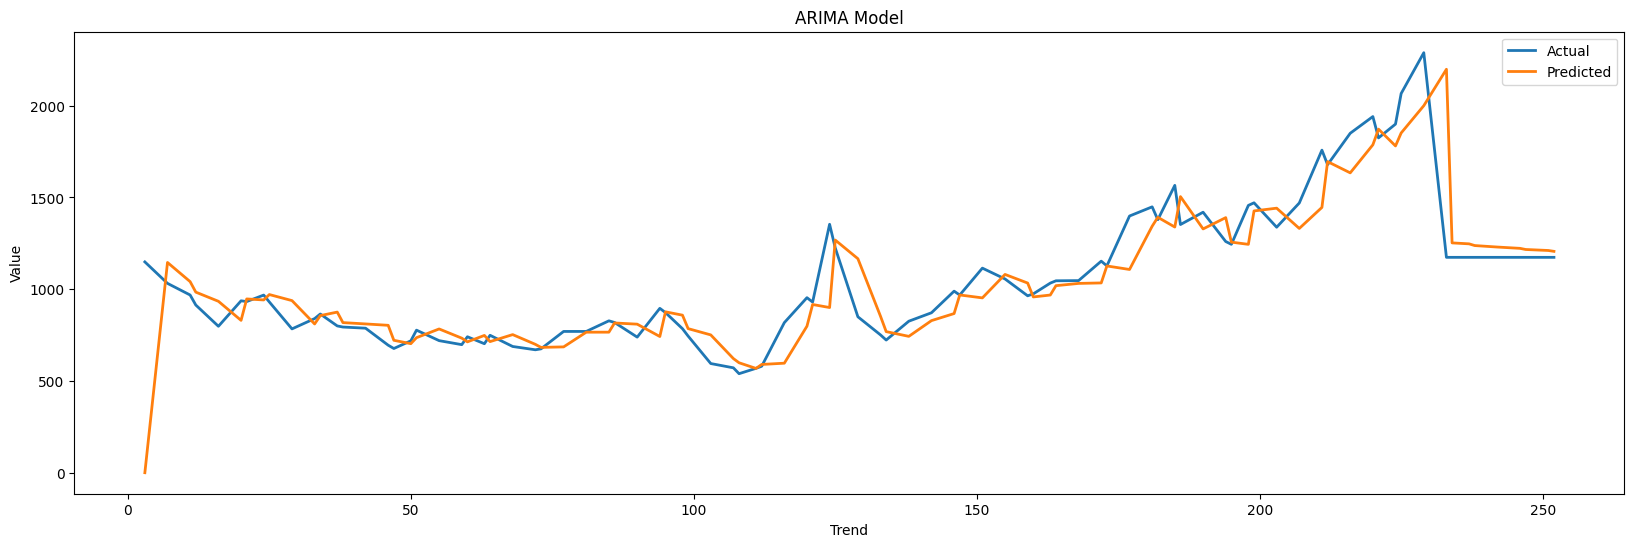

In [7]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='16/08/2021'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data

dftest['hal_High'] = dftest['hal_High'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftest['hal_High'], predictions)
print("MAE:", MAE)
mape = mape(dftest['hal_High'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftest['hal_High'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()


In [25]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='02/04/2018'
end_date='09/08/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftest['hal_Low'])
values =dftest['hal_Low']
series = pd.Series(values.values, index=dates)



# Fit the ARIMA model
order = (1,1,2)
model = ARIMA(dftest['hal_Low'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 112 values
forecast = model_fit.forecast(steps=112)
# Print the forecasted values
print(forecast)

                               SARIMAX Results                                
Dep. Variable:                hal_Low   No. Observations:                   58
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -349.976
Date:                Fri, 06 Oct 2023   AIC                            707.951
Time:                        14:56:04   BIC                            716.124
Sample:                             0   HQIC                           711.127
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5706      0.460     -1.242      0.214      -1.471       0.330
ma.L1          0.5532      0.473      1.170      0.242      -0.374       1.480
ma.L2         -0.1988      0.205     -0.968      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

<ipython-input-27-1501cff3ccb8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain['hal_Low'] = dftrain['hal_Low'].astype(float)


MAE: 95.74546344750858
MAPE: 10.750106120827946


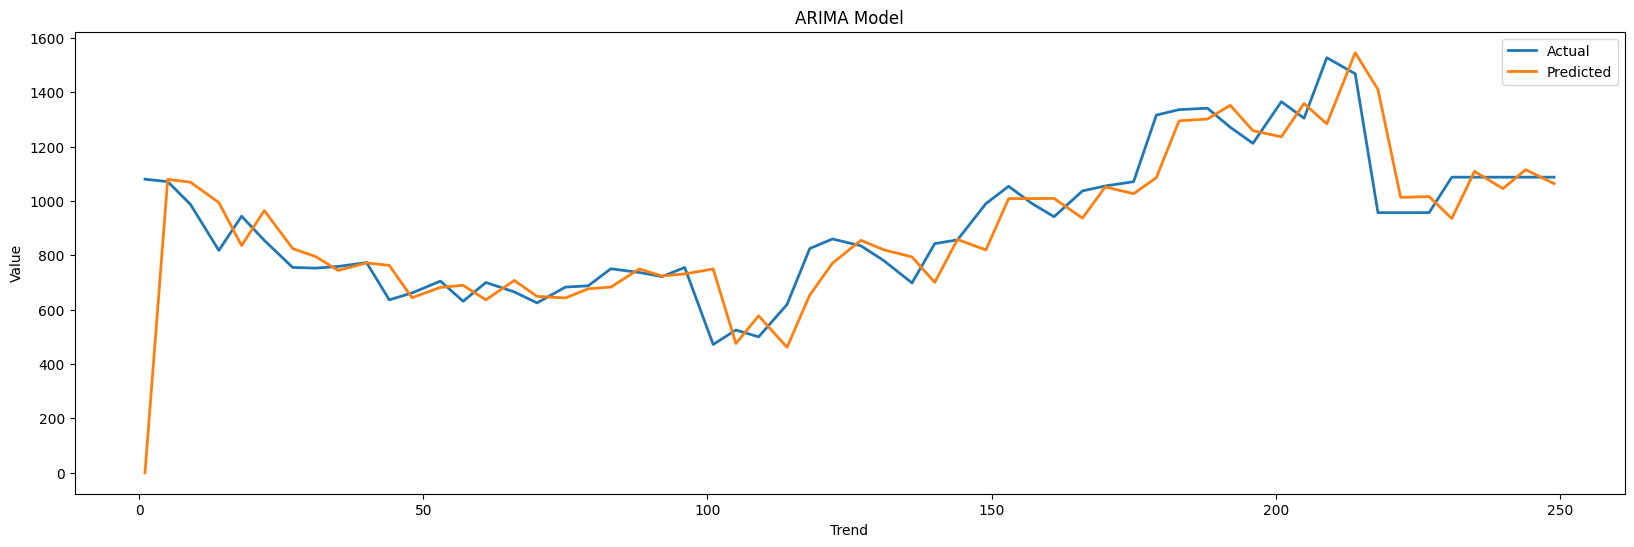

In [27]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='02/04/2018'
end_date='09/08/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]

# Prepare the data

dftrain['hal_Low'] = dftrain['hal_Low'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftrain['hal_Low'], predictions)
print("MAE:", MAE)
mape = mape(dftrain['hal_Low'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftrain['hal_Low'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()


In [29]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='16/08/2021'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftest['hal_Low'])
values =dftest['hal_Low']
series = pd.Series(values.values, index=dates)



# Fit the ARIMA model
order = (1,1,2)
model = ARIMA(dftest['hal_Low'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 76 values
forecast = model_fit.forecast(steps=76)
# Print the forecasted values
print(forecast)

                               SARIMAX Results                                
Dep. Variable:                hal_Low   No. Observations:                   91
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -537.966
Date:                Fri, 06 Oct 2023   AIC                           1083.933
Time:                        14:57:48   BIC                           1093.932
Sample:                             0   HQIC                          1087.965
                                 - 91                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7837      0.214      3.668      0.000       0.365       1.202
ma.L1         -0.8950      0.212     -4.230      0.000      -1.310      -0.480
ma.L2          0.0086      0.103      0.084      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

<ipython-input-31-4918841a101b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['hal_Low'] = dftest['hal_Low'].astype(float)


MAE: 71.24898247251072
MAPE: 7.911843949880712


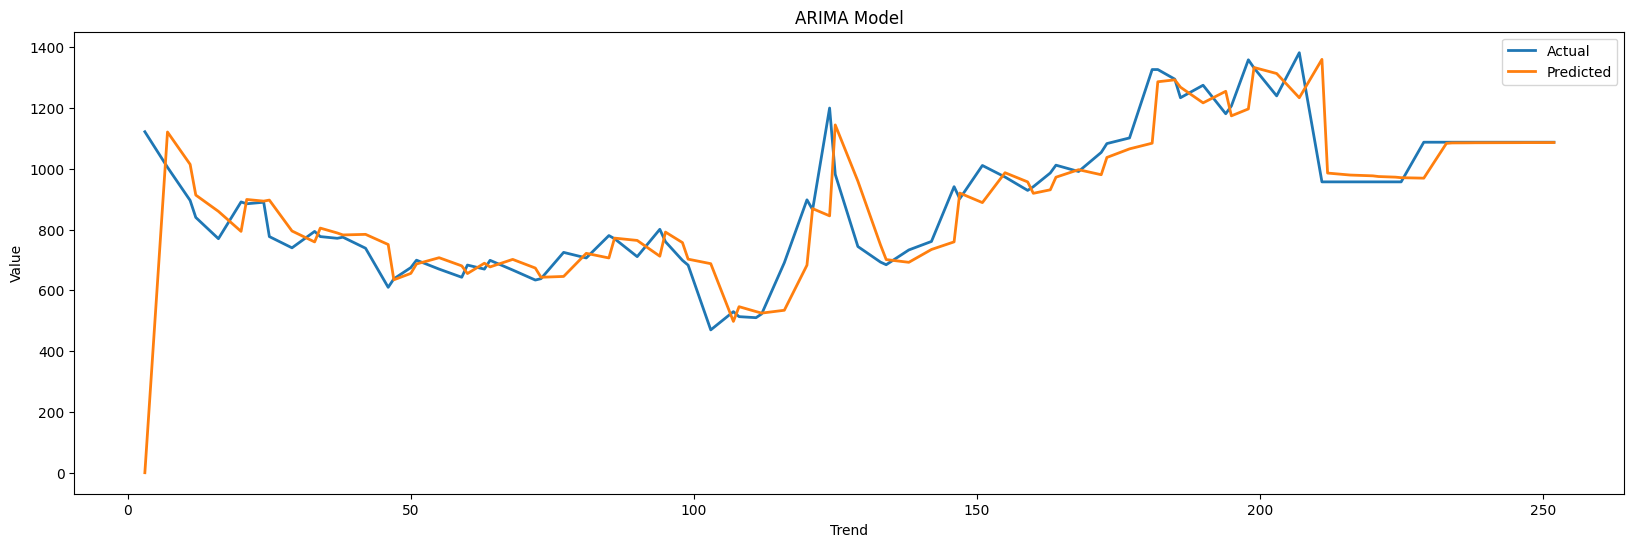

In [31]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='16/08/2021'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data

dftest['hal_Low'] = dftest['hal_Low'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftest['hal_Low'], predictions)
print("MAE:", MAE)
mape = mape(dftest['hal_Low'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftest['hal_Low'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()


In [50]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='02/04/2018'
end_date='09/08/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftest['zentec_High'])
values =dftest['zentec_High']
series = pd.Series(values.values, index=dates)



# Fit the ARIMA model
order = (1,1,2)
model = ARIMA(dftest['zentec_High'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 112 values
forecast = model_fit.forecast(steps=112)
# Print the forecasted values
print(forecast)

                               SARIMAX Results                                
Dep. Variable:            zentec_High   No. Observations:                   58
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -249.779
Date:                Fri, 06 Oct 2023   AIC                            507.558
Time:                        15:18:32   BIC                            515.730
Sample:                             0   HQIC                           510.734
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4087      2.125      0.192      0.847      -3.755       4.573
ma.L1         -0.4576      2.178     -0.210      0.834      -4.727       3.811
ma.L2          0.1249      0.200      0.623      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

<ipython-input-51-ed4c48690db9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain['zentec_High'] = dftrain['zentec_High'].astype(float)


MAE: 13.860096246412095
MAPE: 13.478456514142593


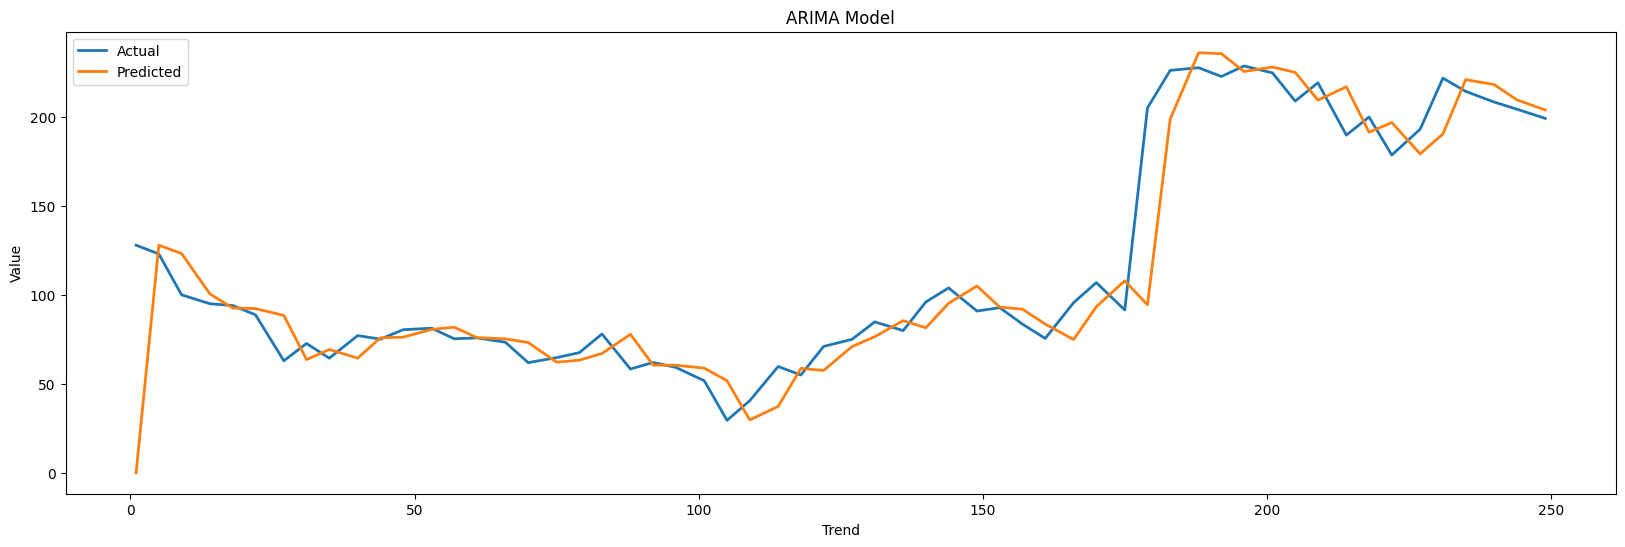

In [51]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='02/04/2018'
end_date='09/08/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]

# Prepare the data

dftrain['zentec_High'] = dftrain['zentec_High'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftrain['zentec_High'], predictions)
print("MAE:", MAE)
mape = mape(dftrain['zentec_High'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftrain['zentec_High'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()


In [37]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='16/08/2021'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftest['zentec_High'])
values =dftest['zentec_High']
series = pd.Series(values.values, index=dates)



# Fit the ARIMA model
order = (1,1,2)
model = ARIMA(dftest['zentec_High'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 76 values
forecast = model_fit.forecast(steps=76)
# Print the forecasted values
print(forecast)

                               SARIMAX Results                                
Dep. Variable:            zentec_High   No. Observations:                   91
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -372.378
Date:                Fri, 06 Oct 2023   AIC                            752.756
Time:                        15:02:03   BIC                            762.755
Sample:                             0   HQIC                           756.788
                                 - 91                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4305      1.690     -0.255      0.799      -3.743       2.882
ma.L1          0.5250      1.702      0.308      0.758      -2.811       3.861
ma.L2          0.0910      0.175      0.522      0.6

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

<ipython-input-38-bcb28296ac28>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['zentec_High'] = dftest['zentec_High'].astype(float)


MAE: 10.338929117170554
MAPE: 10.606892162166371


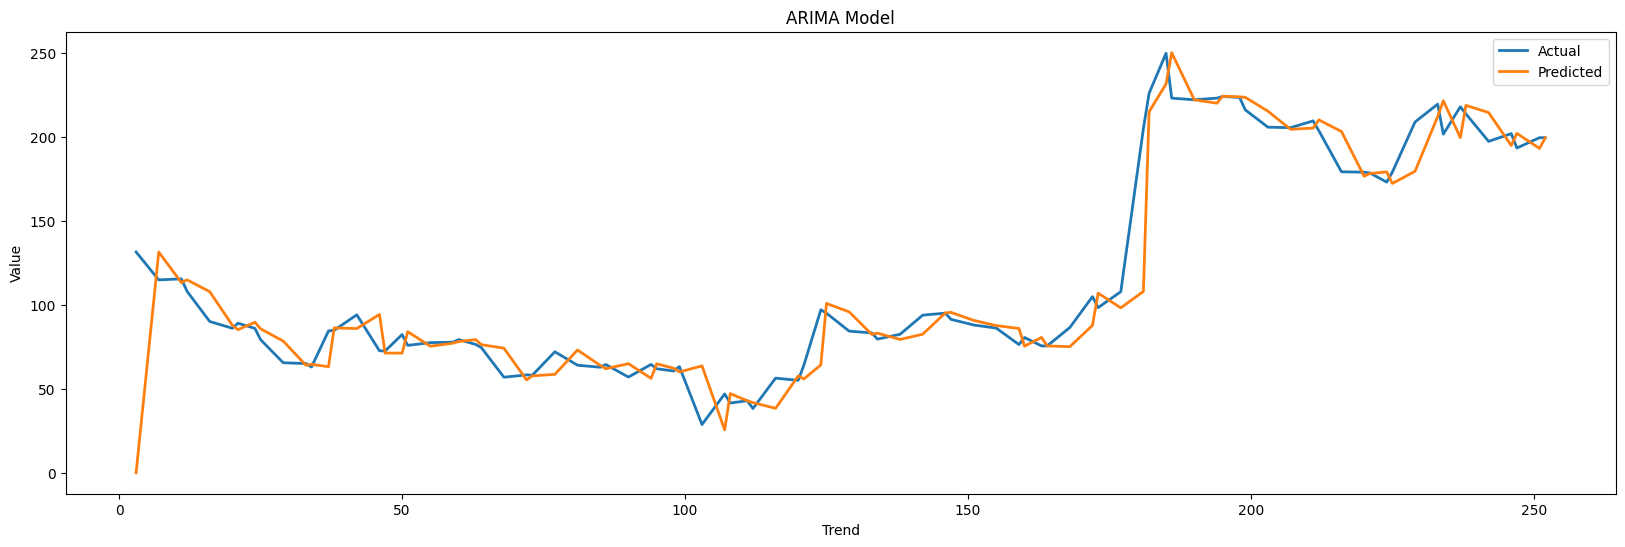

In [38]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='16/08/2021'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data

dftest['zentec_High'] = dftest['zentec_High'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftest['zentec_High'], predictions)
print("MAE:", MAE)
mape = mape(dftest['zentec_High'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftest['zentec_High'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()


In [49]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='02/04/2018'
end_date='09/08/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftest['zentec_Low'])
values =dftest['zentec_Low']
series = pd.Series(values.values, index=dates)



# Fit the ARIMA model
order = (1,1,2)
model = ARIMA(dftest['zentec_Low'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 112 values
forecast = model_fit.forecast(steps=112)
# Print the forecasted values
print(forecast)

                               SARIMAX Results                                
Dep. Variable:             zentec_Low   No. Observations:                   58
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -245.069
Date:                Fri, 06 Oct 2023   AIC                            498.138
Time:                        15:17:45   BIC                            506.311
Sample:                             0   HQIC                           501.314
                                 - 58                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2490      0.728      0.342      0.732      -1.178       1.676
ma.L1         -0.3481      0.803     -0.434      0.665      -1.922       1.226
ma.L2          0.2787      0.150      1.861      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

<ipython-input-43-8900da3353f9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain['zentec_Low'] = dftrain['zentec_Low'].astype(float)


MAE: 13.078736834871737
MAPE: 13.979202771813517


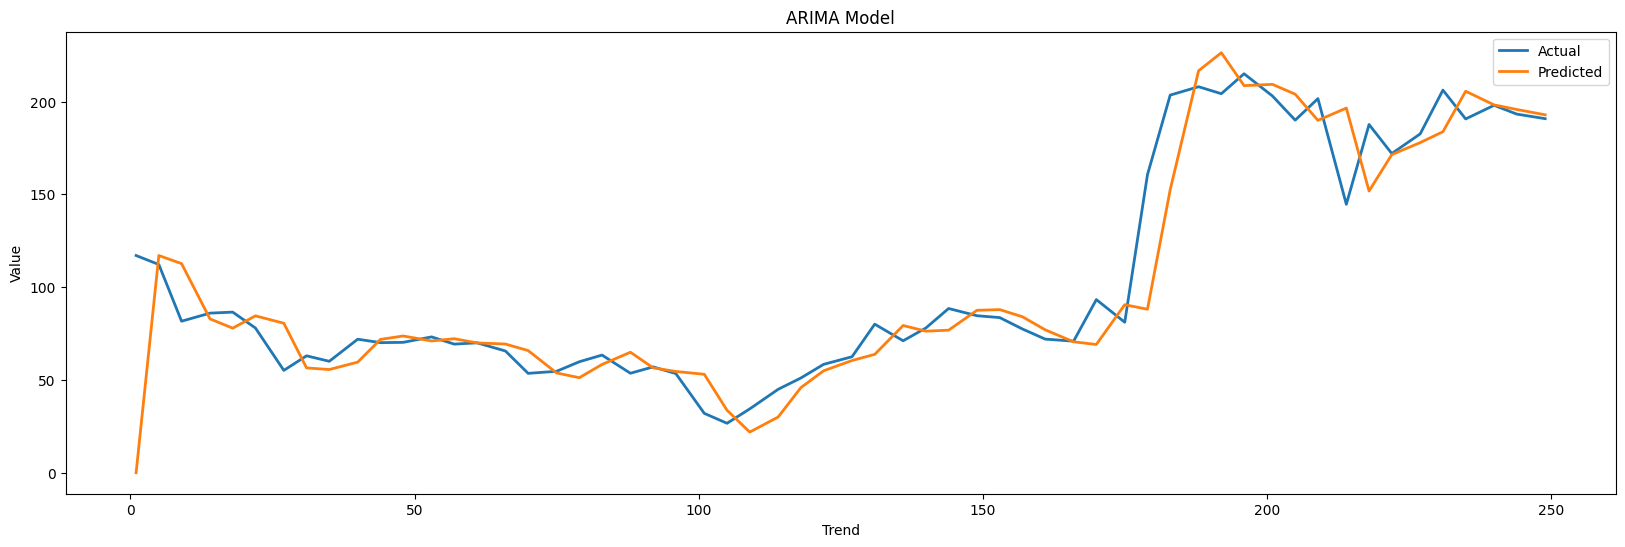

In [43]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='02/04/2018'
end_date='09/08/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]

# Prepare the data

dftrain['zentec_Low'] = dftrain['zentec_Low'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftrain['zentec_Low'], predictions)
print("MAE:", MAE)
mape = mape(dftrain['zentec_Low'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftrain['zentec_Low'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()


In [47]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='16/08/2021'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftest['zentec_Low'])
values =dftest['zentec_Low']
series = pd.Series(values.values, index=dates)



# Fit the ARIMA model
order = (1,1,2)
model = ARIMA(dftest['zentec_Low'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 76 values
forecast = model_fit.forecast(steps=76)
# Print the forecasted values
print(forecast)

                               SARIMAX Results                                
Dep. Variable:             zentec_Low   No. Observations:                   91
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -369.706
Date:                Fri, 06 Oct 2023   AIC                            747.411
Time:                        15:16:29   BIC                            757.410
Sample:                             0   HQIC                           751.443
                                 - 91                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2207      2.362     -0.093      0.926      -4.850       4.409
ma.L1          0.2606      2.376      0.110      0.913      -4.397       4.918
ma.L2         -0.0556      0.154     -0.361      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

<ipython-input-48-9821ecf113e5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['zentec_Low'] = dftest['zentec_Low'].astype(float)


MAE: 9.826054647372763
MAPE: 11.187987941793246


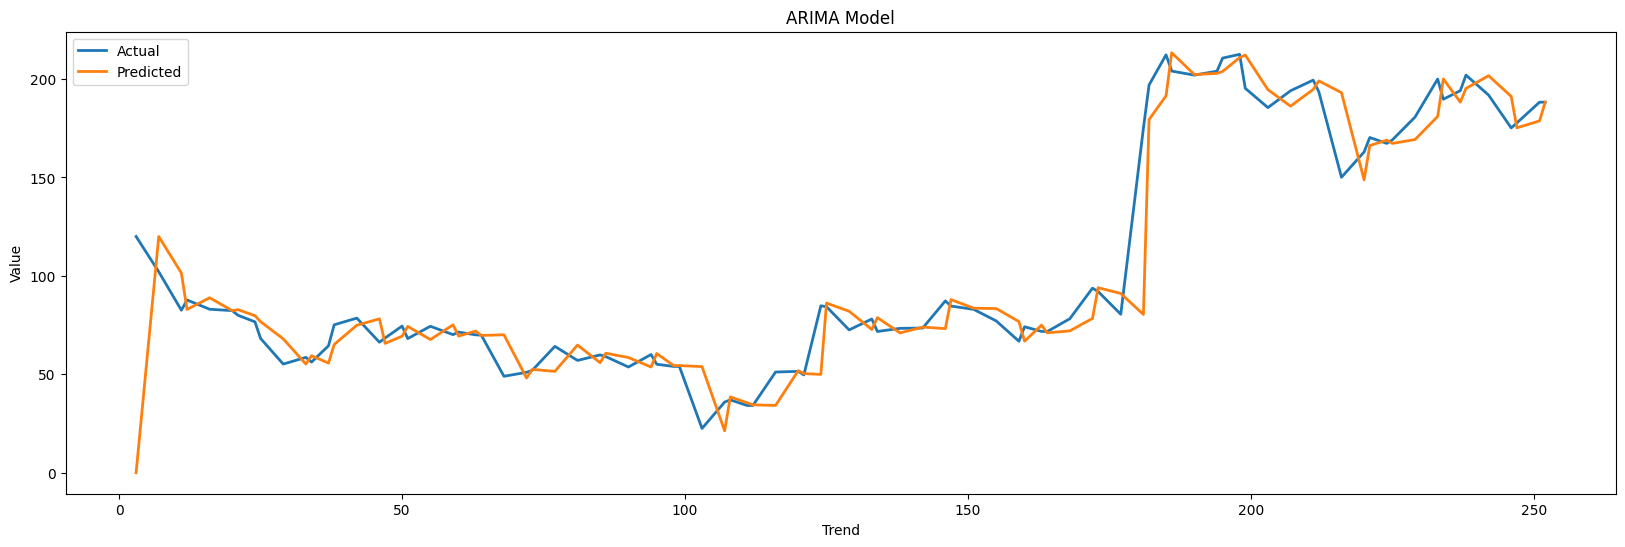

In [48]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
df=pd.read_csv("TimeSeriesDatasetModified.csv")
start_date='16/08/2021'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Prepare the data

dftest['zentec_Low'] = dftest['zentec_Low'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftest['zentec_Low'], predictions)
print("MAE:", MAE)
mape = mape(dftest['zentec_Low'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftest['zentec_Low'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                 hal_High   No. Observations:                   58
Model:             ExponentialSmoothing   SSE                        1919158.062
Optimized:                         True   AIC                            635.603
Trend:                         Additive   BIC                            668.570
Seasonal:                      Additive   AICC                           653.142
Seasonal Periods:                    12   Date:                 Sat, 07 Oct 2023
Box-Cox:                          False   Time:                         04:39:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6504355                alpha                 True
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


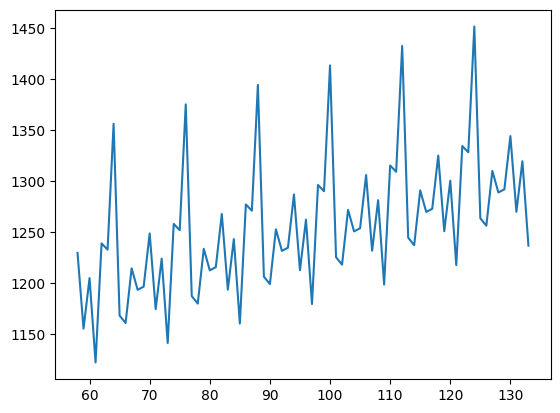

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your dataset
df = pd.read_csv("TimeSeriesDatasetModified.csv")

# Specify the start and end date
start_date = '02/04/2018'
end_date = '09/08/2022'

# Filter the dataset based on the date range
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
dftest = df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftest['Date'], format='%d-%m-%Y')
values = dftest['hal_High']
series = pd.Series(values.values, index=dates)

# Fit the Holt-Winters model
model = ExponentialSmoothing(values, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Make predictions
predictions = model_fit.fittedvalues

# Forecast the next 76 values
forecast = model_fit.forecast(steps=76)

# Print the forecasted values
print(forecast)
plt.plot(forecast)


<ipython-input-82-f54476588dbe>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['hal_High'] = dftest['hal_High'].astype(float)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model witho

Mean Absolute Error (MAE): 332.86751323995634
Mean Absolute Percentage Error (MAPE): 19.60%


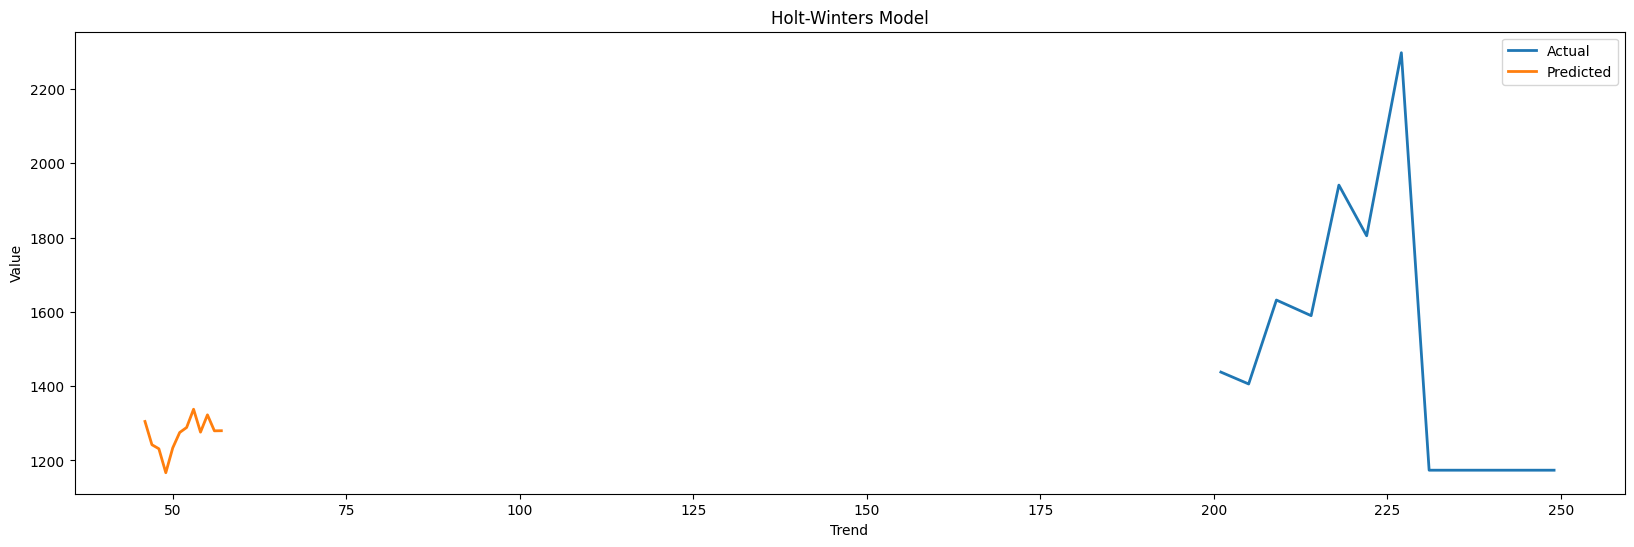

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your time series dataset
df = pd.read_csv("TimeSeriesDatasetModified.csv")

# Specify the start and end date
start_date = '02/04/2018'
end_date = '09/08/2022'

# Filter the dataset based on the date range
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
dftest = df.loc[mask]

# Prepare the data
dftest['hal_High'] = dftest['hal_High'].astype(float)
data = dftest['hal_High']

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Fit the Holt-Winters model
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(len(test_data))

# Calculate MAE and MAPE
mae = mean_absolute_error(test_data, predictions)
mape = mean_absolute_percentage_error(test_data, predictions) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualize the results
plt.figure(figsize=(20, 6))
plt.plot(test_data, label='Actual', linewidth=2)
plt.plot(predictions, label='Predicted', linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('Holt-Winters Model')
plt.legend()
plt.show()


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your dataset
df = pd.read_csv("TimeSeriesDatasetModified.csv")

# Specify the start and end date
start_date = '16/08/2022'
end_date = '27/01/2023'

# Filter the dataset based on the date range
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
dftest = df.loc[mask]

# Prepare the data
dates = pd.to_datetime(dftest['Date'], format='%d-%m-%Y')
values = dftest['hal_High']
series = pd.Series(values.values, index=dates)

# Fit the Holt-Winters model
model = ExponentialSmoothing(values, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Make predictions
predictions = model_fit.fittedvalues

# Forecast the next 76 values
forecast = model_fit.forecast(steps=76)

# Print the forecasted values
print(forecast)


                       ExponentialSmoothing Model Results                       
Dep. Variable:               zentec_Low   No. Observations:                   91
Model:             ExponentialSmoothing   SSE                          17245.806
Optimized:                         True   AIC                            509.246
Trend:                         Additive   BIC                            549.420
Seasonal:                      Additive   AICC                           518.746
Seasonal Periods:                    12   Date:                 Fri, 06 Oct 2023
Box-Cox:                          False   Time:                         17:13:45
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9999840                alpha                 True
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your time series dataset
df = pd.read_csv("TimeSeriesDatasetModified.csv")

# Specify the start and end date
start_date = '16/08/2022'
end_date = '27/01/2023'

# Filter the dataset based on the date range
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
dftest = df.loc[mask]

# Prepare the data
dftest['hal_High'] = dftest['hal_High'].astype(float)
data = dftest['hal_High']

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Fit the Holt-Winters model
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(len(test_data))

# Calculate MAE and MAPE
mae = mean_absolute_error(test_data, predictions)
mape = mean_absolute_percentage_error(test_data, predictions) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualize the results
plt.figure(figsize=(20, 6))
plt.plot(test_data, label='Actual', linewidth=2)
plt.plot(predictions, label='Predicted', linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('Holt-Winters Model')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'statsmodels'